In [16]:
import pandas as pd
from tsne import bh_sne
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
import csv
import numpy

#reader = csv.reader(open("big_data.csv", "rb"), delimiter=",")
#x = list(reader)
#data = numpy.array(x)

big_data = pd.read_csv('big_data.csv')
the_data = big_data.sample(n=10000)

#the_data= pd.read_csv('big_data.csv')

In [29]:
X = the_data

In [30]:
y = the_data.columns.values

In [31]:
print X

        T010101  T010102  T010199  T010201  T010299  T010301  T010399  \
154726    570.0      0.0      0.0     30.0      0.0      0.0      0.0   
153252    480.0      0.0      0.0     75.0      0.0      0.0      0.0   
151942    570.0      0.0      0.0     20.0      0.0      0.0      0.0   
55250     561.0     40.0      0.0    137.0      0.0      0.0      0.0   
110344    350.0      0.0      0.0     45.0      0.0      0.0      0.0   
88233     840.0      0.0      0.0     15.0      0.0      0.0      0.0   
9561      690.0      0.0      0.0      0.0      0.0      0.0      0.0   
84938     480.0      0.0      0.0     20.0      0.0      0.0      0.0   
33526     450.0      0.0      0.0     30.0      0.0     15.0      0.0   
138036    740.0      0.0      0.0     10.0      0.0     20.0      0.0   
139250    540.0      0.0      0.0     30.0      0.0      0.0      0.0   
112545    510.0      0.0      0.0      0.0      0.0      0.0      0.0   
135589    390.0      0.0      0.0     45.0      0.0

In [32]:
print y

['T010101' 'T010102' 'T010199' 'T010201' 'T010299' 'T010301' 'T010399'
 'T010401' 'T010499' 'T010501' 'T010599' 'T019999' 'T020101' 'T020102'
 'T020103' 'T020104' 'T020199' 'T020201' 'T020202' 'T020203' 'T020299'
 'T020301' 'T020302' 'T020303' 'T020399' 'T020401' 'T020402' 'T020499'
 'T020501' 'T020502' 'T020599' 'T020681' 'T020699' 'T020701' 'T020799'
 'T020801' 'T020899' 'T020901' 'T020902' 'T020903' 'T020904' 'T020905'
 'T020999' 'T029999' 'T030101' 'T030102' 'T030103' 'T030104' 'T030105'
 'T030108' 'T030109' 'T030110' 'T030111' 'T030112' 'T030186' 'T030199'
 'T030201' 'T030202' 'T030203' 'T030204' 'T030299' 'T030301' 'T030302'
 'T030303' 'T030399' 'T030401' 'T030402' 'T030403' 'T030404' 'T030405'
 'T030499' 'T030501' 'T030502' 'T030503' 'T030504' 'T030599' 'T039999'
 'T040101' 'T040102' 'T040103' 'T040104' 'T040105' 'T040108' 'T040109'
 'T040110' 'T040111' 'T040112' 'T040186' 'T040199' 'T040201' 'T040202'
 'T040203' 'T040204' 'T040299' 'T040301' 'T040302' 'T040303' 'T040399'
 'T040

In [43]:
X_2d = bh_sne(the_data)

In [34]:
print X_2d

[[-30.70090327  24.28822137]
 [ 29.08178398 -22.88911749]
 [ -6.59016626  -1.64310402]
 ..., 
 [ 17.98770051   3.53373532]
 [ -0.95101368  -1.48858735]
 [-30.36085511  13.07321149]]


In [44]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import time

cluster_range = list(range(2,10)) 
#Go through with different n_components to find the best silhouette score

for n_cluster in cluster_range:
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_cluster, random_state=2).fit(the_data)
    
    # Predict the cluster for each data point
    preds = clusterer.predict(the_data)
      
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(the_data, preds)
    
    print "The score for n_cluster = {}. is : {}". format(n_cluster, score)

The score for n_cluster = 2. is : 0.298466207098
The score for n_cluster = 3. is : 0.237275514129
The score for n_cluster = 4. is : 0.201259542577
The score for n_cluster = 5. is : 0.180422924536
The score for n_cluster = 6. is : 0.186853263088
The score for n_cluster = 7. is : 0.192864067025
The score for n_cluster = 8. is : 0.189223990273
The score for n_cluster = 9. is : 0.102349853956


In [51]:
n_clusters = 2
km = KMeans(n_clusters)
clusters = km.fit_predict(the_data)
labels = km.labels_

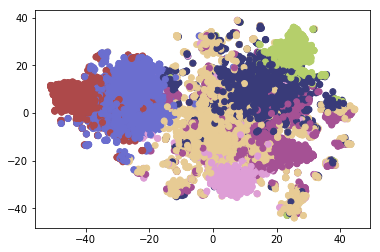

In [50]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap=plt.cm.get_cmap("Vega20b", 10))
#plt.scatter(result[:,0], result[:,1], c=labels, cmap=plt.cm.get_cmap("Vega20b", 10))